### Summary :
This notebook explores a Logistic Regression and Decision Tree base models, as well as with various SMOTE variations, and Decision Tree and Random Forest models with hyperparameter tuning and PCA, to predict `Benzos` usage. The performance of these models is evaluated using confusion matrices and classification reports.

# INDEX
- [Logistic Regression](#logreg)
- [Coefficient analysis](#Coef)
- [Logistic Regression with SMOTE variations and Confusion Matrix](#logreg_smote)
- [Logistic Regression with BorderlineSMOTE](#logreg_ADA)
- [Decision Tree](#DT)
- [Decision Tree and Random Forest with PCA](#DTRM)
- [Models Comparison](#Models)
<a id='INDEX'></a>

In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency,ttest_ind
from sklearn.model_selection import train_test_split


In [13]:
df = pd.read_csv('drug_consumption_model_ready.csv')

I am trying to predict the likelihood of `Benzos` use based on patterns of other drug usage. Going to try Logistic Regression, Decision Tree and Random Forest with PCA and pipeline.

In [14]:
# Split the data into train and test with 75% volume in training dataset and 25% in testing dataset

X = df.drop(['Benzos','Unnamed: 0'],axis=1)
y = df['Benzos']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)


### Logistic Regression <a id='logreg'></a>

In [15]:
from sklearn.linear_model import LogisticRegression

# Instantiate logistic regression models
logreg = LogisticRegression()

# Fit models separately on positive and negative reviews
logreg.fit(X_train, y_train)


# Print train and test scores for both models
print((f"Train score: {logreg.score(X_train, y_train)}")) 
print(f"Test score: {logreg.score(X_test, y_test)}")

Train score: 0.873481057898499
Test score: 0.8758029978586723


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



- **High Accuracy:** 
Both the training and testing scores are nearly identical and very high, indicating that the model is        performing well and is likely well-generalized to new, unseen data.
- **Low Overfitting Risk:**
 The close match between the train and test scores suggests that the model is not overfitting to the training   data.
- **Reliability:**
  Given the high accuracy, the model can be considered reliable for making predictions on new data within the   context of the data it was trained on.

### Coefficient analysis <a id='Coef'></a>

In [16]:
#The intercept
intercept = np.exp(logreg.intercept_)

#The coefficients return an array with one entry for each feature. 
#Since this is logistic regression, the coefficients can be interpreted by exponentiating them
coefficient = np.exp(logreg.coef_[0])


print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficient}')

Intercept: [0.41852863]
Coefficients: [1.03884352 0.98845903 1.01381615 0.95886096 0.99671277 0.86807196
 0.70252647 1.6078141  3.49013124 1.58726993 0.87795433 1.18063494
 0.55238317 2.27255433 1.05563157 1.14047368 1.49948705 2.5323813
 1.33061121 0.59202487 6.38752639 0.99412386 1.5015093  1.12963049
 2.43042152 0.76586016 0.57703495 0.87923056 0.81662356 0.91298744
 1.63511614 0.89592913 0.8724203  0.77694717 1.12035953 0.60598963
 0.57443166 0.77428432 0.79260841 0.95652389 0.92453912 1.41753237
 1.28919694 0.6668183  1.31206888 0.89829718 0.80409175 0.45731259
 1.18612208]


<Figure size 640x480 with 0 Axes>

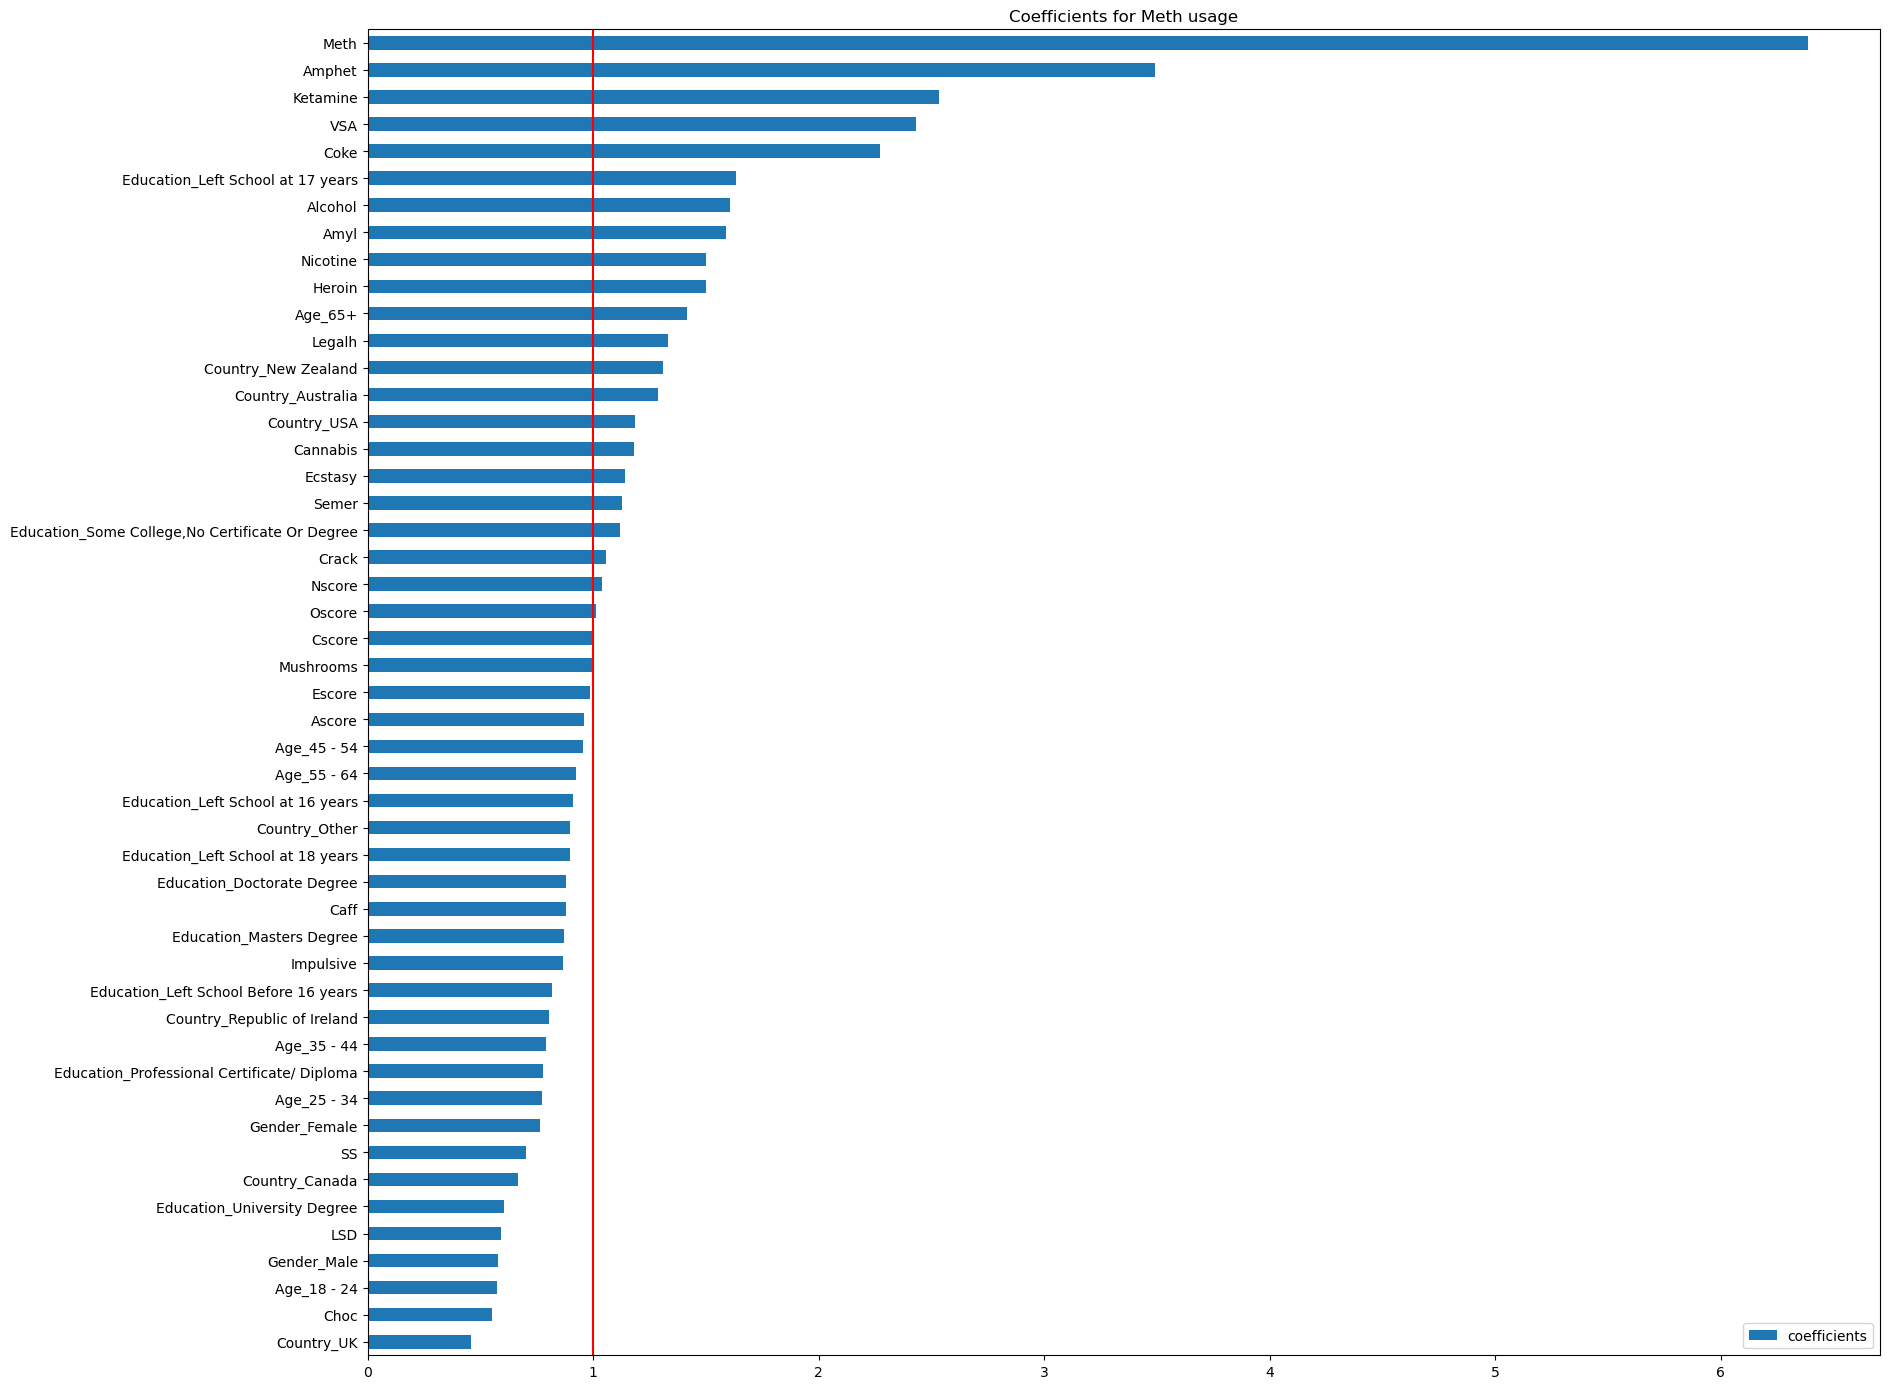

In [17]:
plt.figure()

#Creating a data frame with sorting by 'coefficients'
df1 = pd.DataFrame(
    data={"coefficients": coefficient},
    index=X_train.columns
).sort_values(by="coefficients")

#Plotting the horizontal bar graph
df1.plot(kind="barh", figsize=(19, 14), title="Coefficients for Meth usage")
plt.axvline(1, c='r')
plt.tight_layout()
plt.show()



In [18]:
df1

,coefficients
Country_UK,0.457313
Choc,0.552383
Age_18 - 24,0.574432
Gender_Male,0.577035
LSD,0.592025
Education_University Degree,0.605990
Country_Canada,0.666818
SS,0.702526
Gender_Female,0.765860
Age_25 - 34,0.774284


The coefficients for this model reveal a range of factors influencing the outcome. Higher values indicate stronger associations. Notable among these are the significant associations with methamphetamine use (6.39), amphetamines (3.49), and ketamine (2.53), suggesting these substances have a substantial impact. Age groups, particularly those 65 and older (1.42), and various educational backgrounds, such as leaving school at 17 (1.64), also show strong influences. Geographical factors like being from Australia (1.29) or the USA (1.19) play notable roles. Compared to previous coefficients, this model highlights a broader range of influential factors with greater magnitude, particularly in substance use and educational background, suggesting these aspects are more critical in the current context.

### Logistic Regression Confusion Matrix <a id='logconf'></a>

array([[383,  18],
       [ 40,  26]])

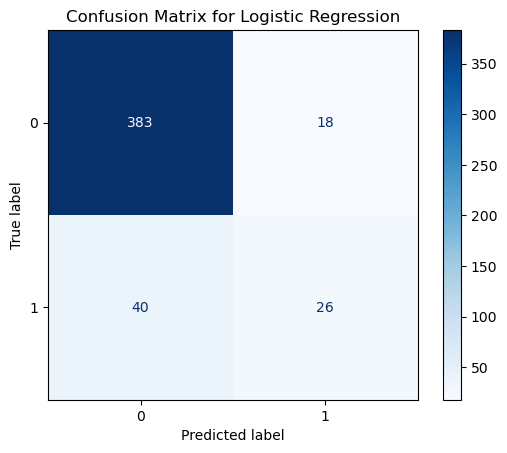

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       401
           1       0.59      0.39      0.47        66

    accuracy                           0.88       467
   macro avg       0.75      0.67      0.70       467
weighted avg       0.86      0.88      0.87       467



In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class predictions
y_pred = logreg.predict(X_test)

# Generate confusion matrix
logreg_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
logreg_df = pd.DataFrame(
    logreg_matrix,
    columns=["Predicted Non-user", "Predicted User"],
    index=["True Non-User", "True User"]
)


display(logreg_matrix)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

from sklearn.metrics import classification_report

report_initial = classification_report(y_test, y_pred)
print(report_initial)

#### Summary

The logistic regression base model performed well overall, with a training score of 0.87 and a test score of 0.88. For the majority class (0), the precision, recall, and f1-score were high at 0.91, 0.96, and 0.93, respectively. However, the model struggled with the minority class (1), achieving a precision of 0.59, recall of 0.39, and f1-score of 0.47. This indicates that while the model is accurate overall, it is less effective at correctly identifying instances of the minority class, highlighting a need for improvement in handling imbalanced data.

### Logistic Regression with SMOTE variations <a id='logreg_smote'></a>

Results for BorderlineSMOTE:
Best parameters for Logistic Regression:  {'model__C': 1}
Best cross-validation score for Logistic Regression: 0.80
Test set score for Logistic Regression: 0.82

Confusion Matrix:
 [[335  66]
 [ 19  47]]



Confusion Report:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89       401
           1       0.42      0.71      0.53        66

    accuracy                           0.82       467
   macro avg       0.68      0.77      0.71       467
weighted avg       0.87      0.82      0.84       467



Results for SMOTEN:
Best parameters for Logistic Regression:  {'model__C': 10}
Best cross-validation score for Logistic Regression: 0.85
Test set score for Logistic Regression: 0.86

Confusion Matrix:
 [[374  27]
 [ 37  29]]



Confusion Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       401
           1       0.52      0.44      0.48        66

    a

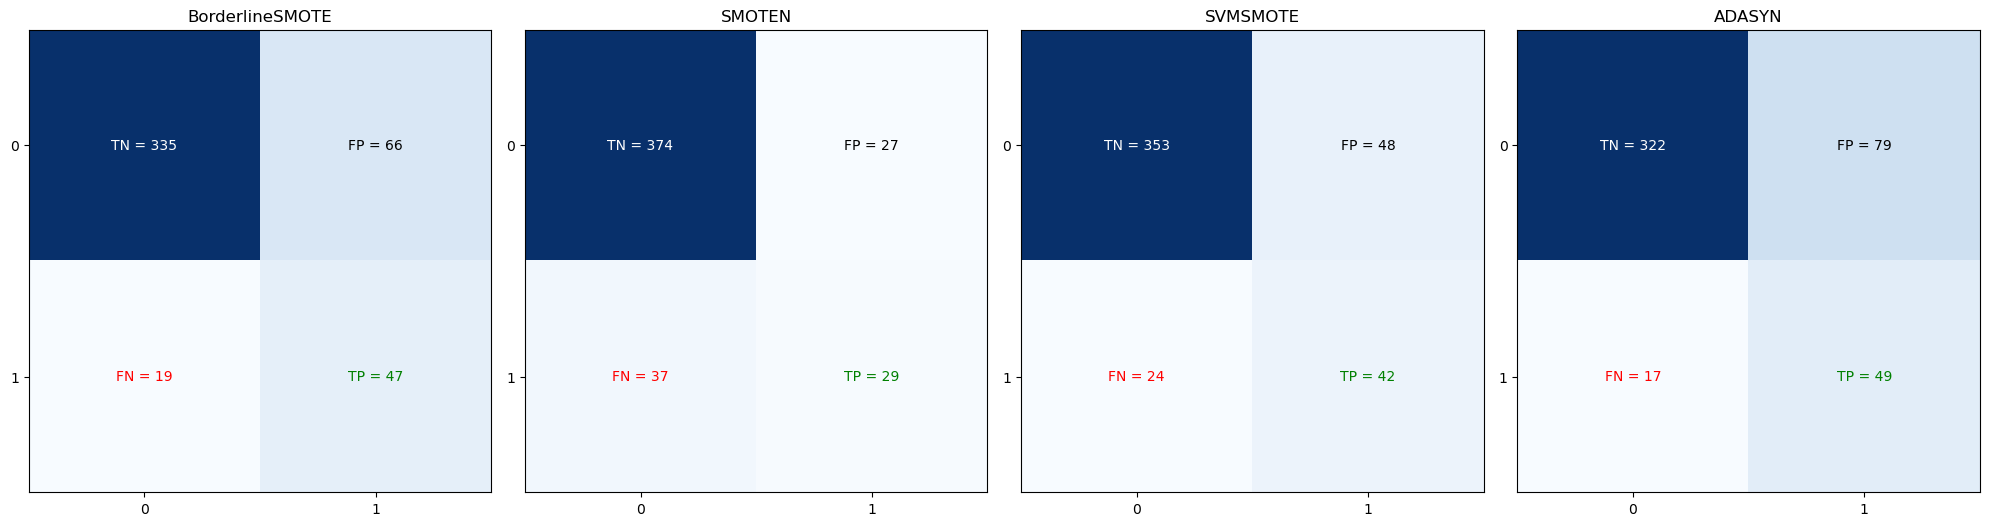

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import BorderlineSMOTE, SMOTEN, SVMSMOTE, KMeansSMOTE, ADASYN
import matplotlib.pyplot as plt

# List of SMOTE variations
smote_variations = [
    ('BorderlineSMOTE', BorderlineSMOTE(random_state=42, sampling_strategy='minority')),
    ('SMOTEN', SMOTEN(random_state=42, sampling_strategy='minority')),
    ('SVMSMOTE', SVMSMOTE(random_state=42, sampling_strategy='minority')),
    ('ADASYN', ADASYN(random_state=42, sampling_strategy='minority'))
]

# Define the parameter grid for GridSearchCV for Logistic Regression
log_param_grid = {
    'model__C': [0.1, 1, 10, 50, 100]
}

# Prepare subplots
fig, axes = plt.subplots(1, len(smote_variations), figsize=(20, 5))

# Loop through each SMOTE variation
for ax, (name, smote) in zip(axes, smote_variations):
    # Define the estimators for the Logistic Regression pipeline
    log_estimators = [
        ('normalize', StandardScaler()),  # Normalize the data
        ('minority', smote),  # Handle imbalanced data with selected SMOTE variation
        ('model', LogisticRegression(max_iter=1000))  # Logistic Regression model
    ]

    # Create the pipeline using imblearn's Pipeline
    log_pipe = ImbPipeline(log_estimators)

    # Create the GridSearchCV object
    log_grid = GridSearchCV(log_pipe, log_param_grid, cv=5)

    # Fit the grid search to the training data (ensure X_train and y_train are defined)
    log_fittedgrid = log_grid.fit(X_train, y_train)

    # Evaluate the best model on the test data (ensure X_test and y_test are defined)
    log_score = log_fittedgrid.score(X_test, y_test)

    # Make predictions using the best model
    y_pred = log_fittedgrid.predict(X_test)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    report_initial = classification_report(y_test, y_pred)

    # Print the best parameters and score for Logistic Regression
    print(f"Results for {name}:")
    print("Best parameters for Logistic Regression: ", log_fittedgrid.best_params_)
    print("Best cross-validation score for Logistic Regression: {:.2f}".format(log_fittedgrid.best_score_))
    print("Test set score for Logistic Regression: {:.2f}".format(log_score))
    print("\nConfusion Matrix:\n", cm)
    print("\n")
    print("\nConfusion Report:\n", report_initial)
    print("\n")
    
    # Extract TP, TN, FP, FN
    tn, fp, fn, tp = cm.ravel()
       
    #Set the plot
    ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(name)
    
    # Add labels to the plot
    classes = ['Negative', 'Positive']
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)

    
    # Add TP, TN, FP, FN values to the plot
    ax.text(0, 0, f'TN = {tn}', ha='center', va='center', color='white')
    ax.text(1, 0, f'FP = {fp}', ha='center', va='center', color='black')
    ax.text(0, 1, f'FN = {fn}', ha='center', va='center', color='red')
    ax.text(1, 1, f'TP = {tp}', ha='center', va='center', color='green')     
    
    
#Display the plot
plt.tight_layout()
plt.show()





### Summary of SMOTE Variations
#### BorderlineSMOTE
- **Use Case:** Effective when the decision boundary is critical, and samples near the border are more informative.
- **Summary:** Generates synthetic samples only near the borderline instances, which are difficult to classify. This helps in improving the classifier's performance on challenging cases but might lead to higher false negatives.
#### SVMSMOTE

- **Use Case:** Useful when the decision boundary is complex, and SVM can help in identifying the support vectors that form the boundary.
- **Summary:** Uses Support Vector Machine (SVM) to identify the borderline instances and generate synthetic samples. Balances the data near the decision boundary, improving the model's ability to classify difficult instances correctly.
#### KMeansSMOTE

- **Use Case:** Suitable when the minority class has distinct sub-clusters, and generating samples within these clusters is beneficial.
- **Summary:** Applies KMeans clustering to find sub-clusters within the minority class and generates synthetic samples within these clusters. Helps in better representation of the minority class by preserving the cluster structure but might not always improve true positive rates significantly.
#### ADASYN

- **Use Case:** Ideal when dealing with highly imbalanced datasets where some minority instances are harder to learn.
- **Summary:** ADASYN (Adaptive Synthetic Sampling) focuses on generating more synthetic samples for minority instances that are harder to learn. It adaptively shifts the decision boundary towards the difficult instances, resulting in higher true positive rates but also increasing the number of false positives.

### Summary

In comparing the models, BorderlineSMOTE achieved an accuracy of 0.82 with a minority class recall of 0.71, indicating a strong ability to identify the minority class. SMOTEN, with an accuracy of 0.86, had a minority class recall of 0.44, which is lower than BorderlineSMOTE but still reasonable. SVMSMOTE had an accuracy of 0.85 and a minority class recall of 0.64, showing a balanced performance. ADASYN, with an accuracy of 0.79, had the highest minority class recall of 0.74 but the lowest overall accuracy.

Considering both overall performance and minority class recall, BorderlineSMOTE is recommended as it provides a good balance with a high minority class recall and acceptable overall accuracy.

### Logistic Regression with BorderlineSMOTE <a id='logreg_ADA'></a>

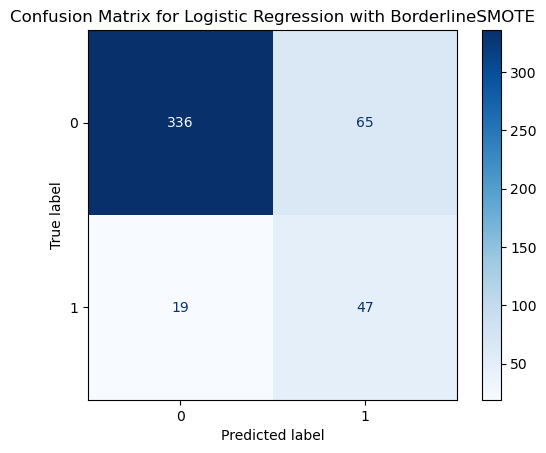

Best parameters for Logistic Regression:  {'C': 7, 'max_iter': 100}
Best cross-validation score for Logistic Regression: 0.83


In [21]:
## Model with BorderlineSMOTE method to extract coefficient

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply BorderlineSMOTE to handle imbalanced data
adasyn = BorderlineSMOTE(random_state=42, sampling_strategy='minority')
X_resampled, y_resampled = adasyn.fit_resample(X_train_scaled, y_train)

# Define the parameter grid for GridSearchCV for Logistic Regression
param_grid = {
    'C': [0.1, 1, 7, 8, 10, 12, 15, 25],
    'max_iter': [100, 200, 500, 1000]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(C=80), param_grid, cv=5)

# Fit the GridSearchCV to the resampled training data
grid_search.fit(X_resampled, y_resampled)

# Get the best estimator
best_log_reg = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_log_reg.predict(X_test_scaled)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression with BorderlineSMOTE")
plt.show()

# Print the best parameters and score for Logistic Regression
print("Best parameters for Logistic Regression: ", grid_search.best_params_)
print("Best cross-validation score for Logistic Regression: {:.2f}".format(grid_search.best_score_))

# Print the model coefficients with column names, sorted by absolute value
coefficients = best_log_reg.coef_[0]
feature_names = X.columns  # Assuming X is a DataFrame




### Coefficient analysis <a id='Coef'></a>

In [22]:
# Print the model coefficients with column names
coefficients2 = np.exp(best_log_reg.coef_[0])
feature_names = X.columns  # X is a DataFrame


<Figure size 640x480 with 0 Axes>

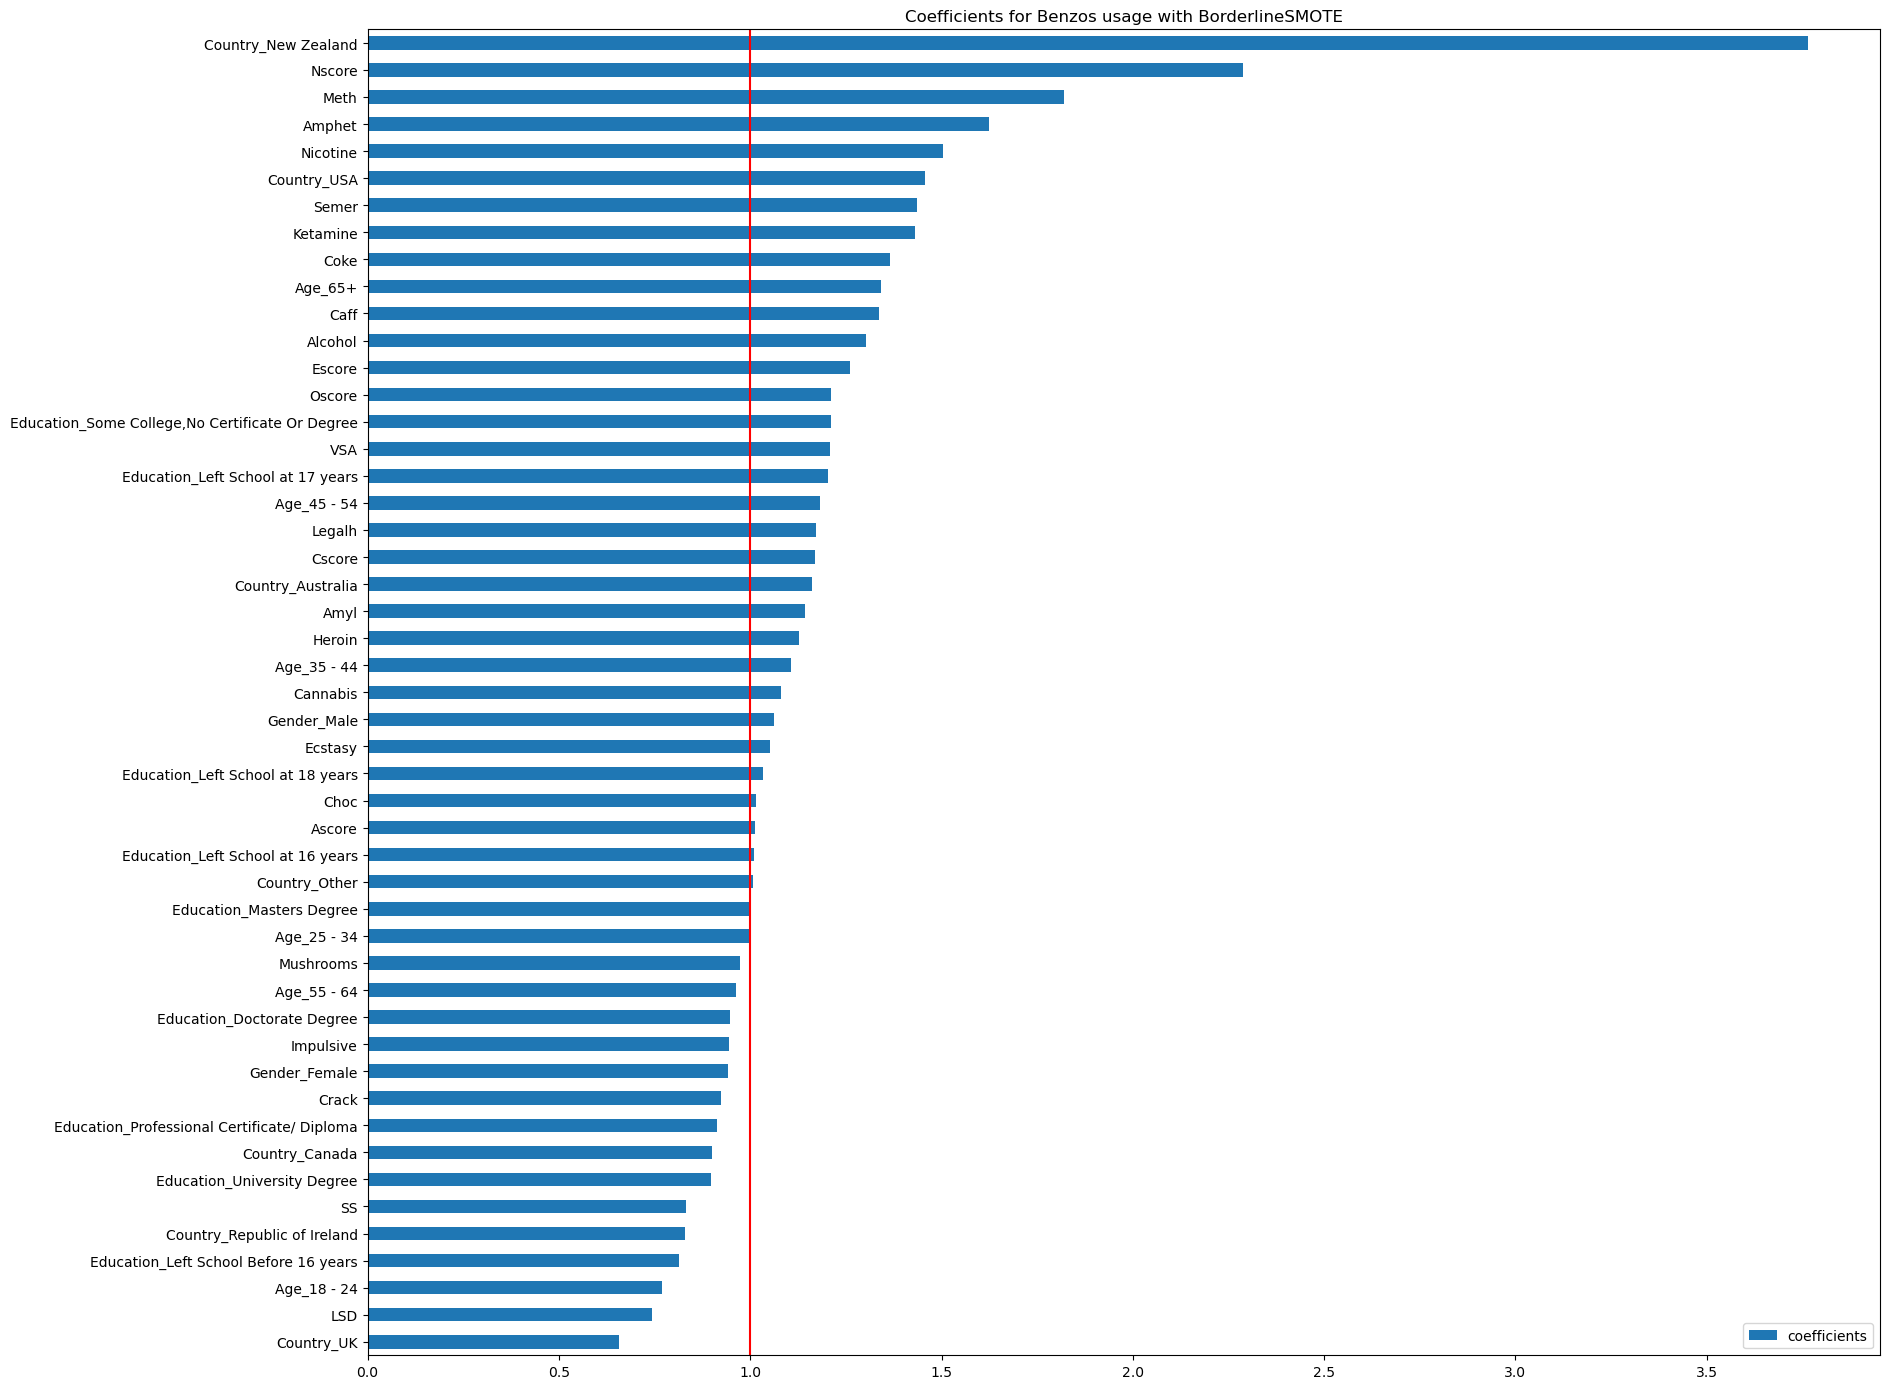

In [23]:
plt.figure()

#Creating a data frame with sorting by 'coefficients'
df2 = pd.DataFrame(
    data={"coefficients": coefficients2},
    index=X.columns
).sort_values(by="coefficients")

#Plotting the horizontal bar graph
df2.plot(kind="barh", figsize=(19, 14), title="Coefficients for Benzos usage with BorderlineSMOTE")
plt.axvline(1, c='r')
plt.tight_layout()
plt.show()

In the coefficient analysis for Benzos, several significant predictors were identified. Notably, individuals from New Zealand had the highest coefficient (3.764579), suggesting a strong association. High Neuroticism (Nscore) also had a high coefficient (2.288159), indicating a notable relationship. Other significant predictors included use of Meth (1.819258), Amphetamines (1.623332), and Nicotine (1.503948). Additionally, demographic factors such as being from the USA (1.456085) and older age groups (Age 65+, 1.343074) were also important. Educational background, particularly leaving school before 16 years or having a doctorate degree, and impulsive behavior were further influential factors in predicting Benzos usage. These results highlight a complex interplay of demographic, psychological, and substance use factors in understanding Benzos consumption.

### Decision Tree <a id='DT'></a>

In [25]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)


print(f"The TRAIN classification accuracy is:  {DT.score(X_train,y_train)}")
print(f"The TEST classification accuracy is:  {DT.score(X_test,y_test)}")

The TRAIN classification accuracy is:  1.0
The TEST classification accuracy is:  0.828693790149893


,Predicted Non-user,Predicted User
True Non-User,361,40
True User,40,26


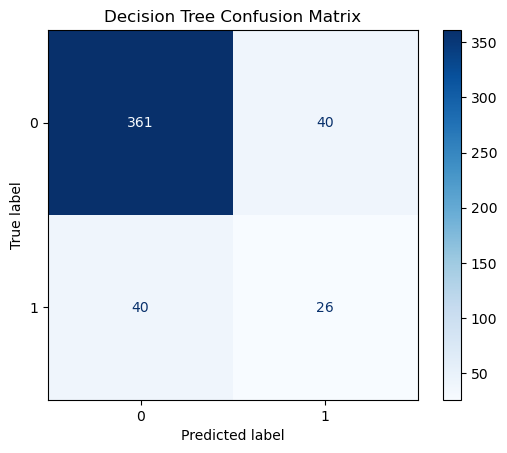

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       401
           1       0.39      0.39      0.39        66

    accuracy                           0.83       467
   macro avg       0.65      0.65      0.65       467
weighted avg       0.83      0.83      0.83       467



In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get class predictions
y_pred1 = DT.predict(X_test)

# Generate confusion matrix
DT_matrix = confusion_matrix(y_test, y_pred1)

# label rows and columns
DT_df = pd.DataFrame(
    DT_matrix,
    columns=["Predicted Non-user", "Predicted User"],
    index=["True Non-User", "True User"]
)

display(DT_df)

# the function expects the estimator, inputs and target as parameters
# Evaluate the model
cm = confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()

from sklearn.metrics import classification_report


report_initial_1 = classification_report(y_test, y_pred1)
print(report_initial_1)

#### Summary
The classification model achieved an overall accuracy of 83%. For the majority class (0), it showed strong performance with precision, recall, and f1-score all at 0.90. However, for the minority class (1), the model's performance was significantly lower, with precision, recall, and f1-score each at 0.39. This indicates the model struggles to correctly identify and predict the minority class. The macro average scores reflect this imbalance, with a precision, recall, and f1-score of 0.65. Despite the high accuracy, improvements are needed for better handling of the minority class.

 ### Decision Tree and Random Forest with PCA <a id='DTRM'></a>

Best parameters for Decision Tree:  {'model__max_depth': 3, 'model__min_impurity_decrease': 0.0, 'model__min_samples_leaf': 40}
Best cross-validation score for Decision Tree: 0.84
Test set score for Decision Tree: 0.87
Best parameters for Random Forest:  {'model__max_depth': 30, 'model__min_samples_leaf': 2, 'model__min_samples_split': 7, 'model__n_estimators': 50}
Best cross-validation score for Random Forest: 0.86
Test set score for Random Forest: 0.88


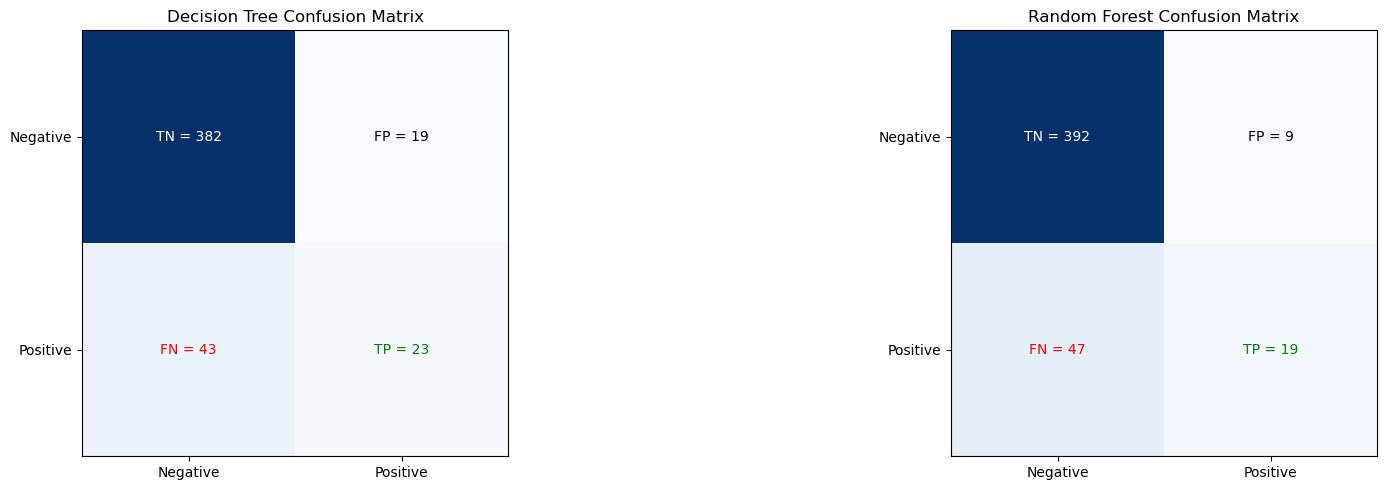

,Predicted Non-user,Predicted User
True Non-User,382,19
True User,43,23


,Predicted Non-user,Predicted User
True Non-User,392,9
True User,47,19



Decision Tree Confusion Matrix:
 [[382  19]
 [ 43  23]]

Random Forest Confusion Matrix:
 [[392   9]
 [ 47  19]]

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       401
           1       0.55      0.35      0.43        66

    accuracy                           0.87       467
   macro avg       0.72      0.65      0.68       467
weighted avg       0.85      0.87      0.85       467


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       401
           1       0.68      0.29      0.40        66

    accuracy                           0.88       467
   macro avg       0.79      0.63      0.67       467
weighted avg       0.86      0.88      0.86       467



In [27]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from tempfile import mkdtemp
import matplotlib.pyplot as plt

# Create a temporary directory for caching the pipeline
cachedir = mkdtemp()

# Define the estimators for the Decision Tree pipeline
dt_estimators = [
    ('normalize', StandardScaler()),  # Normalize the data
    ('reduce_dim', PCA(n_components=20)),  # PCA with 10 components
    ('model', DecisionTreeClassifier())  # Decision Tree model
]

# Define the estimators for the Random Forest pipeline
rf_estimators = [
    ('normalize', StandardScaler()),  # Normalize the data
    ('reduce_dim', PCA(n_components=20)),  # PCA with 10 components
    ('model', RandomForestClassifier())  # Random Forest model
]

# Create the pipelines using scikit-learn's Pipeline
dt_pipe = Pipeline(dt_estimators, memory=cachedir)
rf_pipe = Pipeline(rf_estimators, memory=cachedir)

# Define the parameter grid for GridSearchCV for Decision Tree
dt_param_grid = {
    'model__max_depth': [3, 5, 7, 9, 11, 13, 21],
    'model__min_samples_leaf': [1, 5, 10, 20, 30, 40],
    'model__min_impurity_decrease': [0.0, 0.01, 0.05, 0.1]
}

# Define the parameter grid for GridSearchCV for Random Forest
rf_param_grid = {
    'model__n_estimators': [10, 30, 50, 100],  # Number of trees
    'model__max_depth': [5, 10, 15, 20, 30],  # Maximum depth
    'model__min_samples_split': [2, 5, 7, 10, 15],  # Minimum samples to split
    'model__min_samples_leaf': [1, 2, 4, 8, 10]  # Minimum samples per leaf
}

# Create the GridSearchCV objects
dt_grid = GridSearchCV(dt_pipe, dt_param_grid, cv=5)
rf_grid = GridSearchCV(rf_pipe, rf_param_grid, cv=5)

# Fit the grid search to the training data (ensure X_train and y_train are defined)
dt_fittedgrid = dt_grid.fit(X_train, y_train)
rf_fittedgrid = rf_grid.fit(X_train, y_train)

# Evaluate the best models on the test data (ensure X_test and y_test are defined)
dt_score = dt_fittedgrid.score(X_test, y_test)
rf_score = rf_fittedgrid.score(X_test, y_test)

# Print the best parameters and scores for Decision Tree
print("Best parameters for Decision Tree: ", dt_fittedgrid.best_params_)
print("Best cross-validation score for Decision Tree: {:.2f}".format(dt_fittedgrid.best_score_))
print("Test set score for Decision Tree: {:.2f}".format(dt_score))

# Print the best parameters and scores for Random Forest
print("Best parameters for Random Forest: ", rf_fittedgrid.best_params_)
print("Best cross-validation score for Random Forest: {:.2f}".format(rf_fittedgrid.best_score_))
print("Test set score for Random Forest: {:.2f}".format(rf_score))


# Make predictions using the best models
dt_predictions = dt_fittedgrid.predict(X_test)
rf_predictions = rf_fittedgrid.predict(X_test)

# Compute confusion matrices
dt_cm = confusion_matrix(y_test, dt_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)

# Plot the confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Decision Tree Confusion Matrix
axes[0].imshow(dt_cm, interpolation='nearest', cmap=plt.cm.Blues)
axes[0].set_title('Decision Tree Confusion Matrix')

# Extract TP, TN, FP, FN for Decision Tree
tn, fp, fn, tp = dt_cm.ravel()

# Add TP, TN, FP, FN values to the Decision Tree plot
axes[0].text(0, 0, f'TN = {tn}', ha='center', va='center', color='white')
axes[0].text(1, 0, f'FP = {fp}', ha='center', va='center', color='black')
axes[0].text(0, 1, f'FN = {fn}', ha='center', va='center', color='red')
axes[0].text(1, 1, f'TP = {tp}', ha='center', va='center', color='green')

# Random Forest Confusion Matrix
axes[1].imshow(rf_cm, interpolation='nearest', cmap=plt.cm.Blues)
axes[1].set_title('Random Forest Confusion Matrix')

# Extract TP, TN, FP, FN for Random Forest
tn1, fp1, fn1, tp1 = rf_cm.ravel()

# Add TP, TN, FP, FN values to the Random Forest plot
axes[1].text(0, 0, f'TN = {tn1}', ha='center', va='center', color='white')
axes[1].text(1, 0, f'FP = {fp1}', ha='center', va='center', color='black')
axes[1].text(0, 1, f'FN = {fn1}', ha='center', va='center', color='red')
axes[1].text(1, 1, f'TP = {tp1}', ha='center', va='center', color='green')

# Add labels to the plot
classes = ['Negative', 'Positive']
tick_marks = np.arange(len(classes))
for ax in axes:
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

# Display the plot
plt.tight_layout()
plt.show()

# DT label rows and columns
DT_df = pd.DataFrame(
    dt_cm,
    columns=["Predicted Non-user", "Predicted User"],
    index=["True Non-User", "True User"]
)

# RF label rows and columns
RF_df = pd.DataFrame(
    rf_cm,
    columns=["Predicted Non-user", "Predicted User"],
    index=["True Non-User", "True User"]
)

# Display confusion matrices as dataframes
display(DT_df)
display(RF_df)

print("\nDecision Tree Confusion Matrix:\n", dt_cm)
print("\nRandom Forest Confusion Matrix:\n", rf_cm)

# Print classification reports
dt_class_report = classification_report(y_test, dt_predictions)
rf_class_report = classification_report(y_test, rf_predictions)

print("\nDecision Tree Classification Report:\n", dt_class_report)
print("\nRandom Forest Classification Report:\n", rf_class_report)


#### Summary:
The Decision Tree model, with parameters max_depth=3, min_impurity_decrease=0.0, and min_samples_leaf=40, achieved a cross-validation score of 0.84 and a test set score of 0.87. Its classification report shows high performance for the majority class (precision 0.90, recall 0.95), but lower performance for the minority class (precision 0.55, recall 0.35). The Random Forest model, with parameters max_depth=30, min_samples_leaf=2, min_samples_split=7, and n_estimators=50, had a cross-validation score of 0.86 and a test set score of 0.88. It performed well for the majority class (precision 0.89, recall 0.98), but also struggled with the minority class (precision 0.68, recall 0.29).

### Model Comparison <a id='Models'></a>

In [28]:
# Create an empty dataframe to store the metrics
metrics_df = pd.DataFrame(columns=['Hyperparameter', 'Training Accuracy', 'Test Accuracy', 'Notes'])

# Logistic Regression baseline
metrics_df.loc['Logistic Regression'] = ['None', '87%', '88%', 'Good overall performance, but lower recall for minority class']

# Logistic Regression with SMOTE variations
metrics_df.loc['BorderlineSMOTE'] = ["C=1", "81%", "82%", "Moderate precision and recall balance"]
metrics_df.loc['SMOTEN'] = ["C=10", "86%", "86%", "Higher precision but lower recall for minority class"]
metrics_df.loc['SVMSMOTE'] = ["C=1", "82%", "85%", "Balanced precision and recall among all"]
metrics_df.loc['ADASYN'] = ["C=1", "78%", "79%", "Lower precision and higher recall for minority class"]

# Decision Tree baseline and tuned
metrics_df.loc['Decision Tree (Base)'] = ['None', '100%', '83%', 'High training accuracy, but lower recall for minority class']
metrics_df.loc['Decision Tree'] = [
    "max_depth=3, min_impurity_decrease=0.0, min_samples_leaf=40",
    "84%",
    "87%",
    "Good precision for majority class but moderate performance for minority class"
]

# Random Forest tuned
metrics_df.loc['Random Forest'] = [
    "max_depth=30, min_samples_leaf=2, min_samples_split=7, n_estimators=50",
    "86%",
    "88%",
    "Balanced precision and recall, slightly better than Decision Tree for minority class"
]

# Display the dataframe
metrics_df


,Hyperparameter,Training Accuracy,Test Accuracy,Notes
Logistic Regression,None,87%,88%,"Good overall performance, but lower recall for..."
BorderlineSMOTE,C=1,81%,82%,Moderate precision and recall balance
SMOTEN,C=10,86%,86%,Higher precision but lower recall for minority...
SVMSMOTE,C=1,82%,85%,Balanced precision and recall among all
ADASYN,C=1,78%,79%,Lower precision and higher recall for minority...
Decision Tree (Base),None,100%,83%,"High training accuracy, but lower recall for m..."
Decision Tree,"max_depth=3, min_impurity_decrease=0.0, min_sa...",84%,87%,Good precision for majority class but moderate...
Random Forest,"max_depth=30, min_samples_leaf=2, min_samples_...",86%,88%,"Balanced precision and recall, slightly better..."


### Conclusion:

Based on the results and considering the challenge of data imbalance, several models were evaluated. The Logistic Regression model with SMOTEN (Synthetic Minority Over-sampling Technique for Nominal Data) stands out as the most balanced approach. It achieved a good test score of 0.86 with improved performance in predicting the minority class (precision 0.52, recall 0.44). While the Decision Tree and Random Forest models showed higher overall accuracies (0.87 and 0.88 respectively), their performance on the minority class was notably lower (precision around 0.55 and recall around 0.35 for Decision Tree, and precision 0.68, recall 0.29 for Random Forest). Therefore, for handling the data imbalance effectively, Logistic Regression with SMOTEN appears to be the best choice.

# INDEX
- [Logistic Regression](#logreg)
- [Coefficient analysis](#Coef)
- [Logistic Regression with SMOTE variations and Confusion Matrix](#logreg_smote)
- [Logistic Regression with BorderlineSMOTE](#logreg_ADA)
- [Decision Tree](#DT)
- [Decision Tree and Random Forest with PCA](#DTRM)
- [Models Comparison](#Models)
<a id='INDEX'></a>